# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import functools, re
import random

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gowri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gowri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# IMPORTING DATASET

In [2]:
data = pd.read_csv(r"C:\Users\gowri\Downloads\dataset\final_dataset.csv")
print(data)

                                              tweet_text cyberbullying_type
0                                         hi! I like you  not_cyberbullying
1                                                    hii  not_cyberbullying
2                                             I love you  not_cyberbullying
3                                             I like you  not_cyberbullying
4                                             I miss you  not_cyberbullying
...                                                  ...                ...
47720  Black ppl aren't expected to do anything, depe...          ethnicity
47721  Turner did not withhold his disappointment. Tu...          ethnicity
47722  I swear to God. This dumb nigger bitch. I have...          ethnicity
47723  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47724  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47725 rows x 2 columns]


# DATA PREPROCESSING

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47725 entries, 0 to 47724
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47725 non-null  object
 1   cyberbullying_type  47725 non-null  object
dtypes: object(2)
memory usage: 745.8+ KB


In [4]:
data.drop_duplicates(keep=False,inplace=True)
data.dropna(axis=0,inplace=True)

In [5]:

data

,tweet_text,cyberbullying_type
0,hi! I like you,not_cyberbullying
1,hii,not_cyberbullying
2,I love you,not_cyberbullying
3,I like you,not_cyberbullying
4,I miss you,not_cyberbullying
...,...,...
47720,"Black ppl aren't expected to do anything, depe...",ethnicity
47721,Turner did not withhold his disappointment. Tu...,ethnicity
47722,I swear to God. This dumb nigger bitch. I have...,ethnicity
47723,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


# VISUALIZING THE CATEGORICAL DATA

C:\Users\gowri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


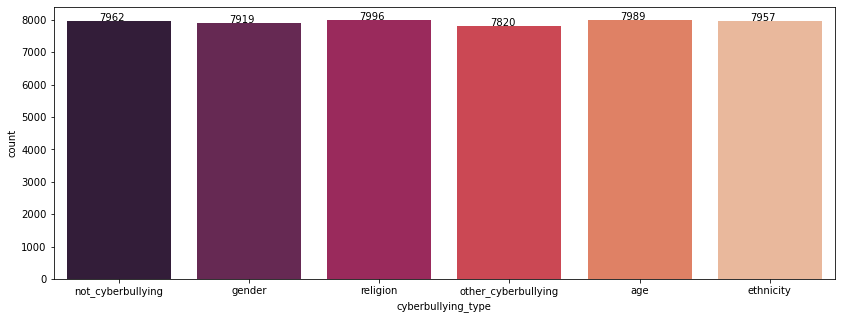

In [6]:
import seaborn as sns
plt.figure(figsize=(14,5))
ax=sns.countplot(data.cyberbullying_type,palette="rocket")
for p in ax.patches:
  ax.annotate('{:}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))

In [7]:
import re
import string
def cleandata(txt):
   txt=str(txt)
   txt=txt.lower()
   txt=txt.strip()
   txt = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF" 
        u"\U0001F680-\U0001F6FF" 
        u"\U0001F1E0-\U0001F1FF"  
                           "]+", flags=re.UNICODE).sub(' ', txt)
   txt=re.compile('\d+').sub(' ', txt)
   txt=re.compile('<.*?>').sub(' ',txt)
   txt=re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', txt)
   txt=re.compile('\s+').sub(' ', txt)
   txt=re.sub(r's+[a-zA-Z]s+', ' ', txt)
   txt=re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', txt)
   txt=re.sub("\\b[^(aiouvAIOUV)]{1} \\b"," ",txt)
   txt=txt.strip()
   return txt

In [8]:
def preprocess(i):
  i=str(i)
  data=pd.read_csv(i,delimiter=",")
  j=0
  for i in data["tweet_text"]:
      data["tweet_text"].iloc[j]=cleandata(i)
      j=j+1
  return data


In [9]:
data=preprocess(r"C:\Users\gowri\Downloads\dataset\final_dataset.csv")

# REMOVING OF STOPWORDS

In [10]:
stopwords = [i.lower() for i in nltk.corpus.stopwords.words('english') + [chr(i) for i in range(97, 123)]]
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:

data['tweet_text'] = data['tweet_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stopwords)]))

In [12]:
data

,tweet_text,cyberbullying_type
0,hi like,not_cyberbullying
1,hii,not_cyberbullying
2,love,not_cyberbullying
3,like,not_cyberbullying
4,miss,not_cyberbullying
...,...,...
47720,black ppl expected anything depended anything ...,ethnicity
47721,turner withhold disappointment turner called c...,ethnicity
47722,swear god dumb nigger bitch got bleach hair re...,ethnicity
47723,yea fuck rt therealexel youre nigger fucking u...,ethnicity


In [13]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


# VISUALIZING TEXT USING WORDCLOUD

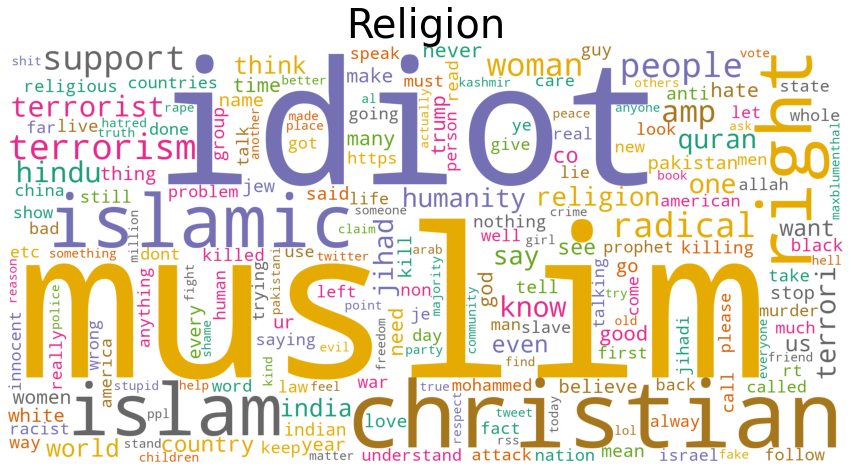

In [14]:
from wordcloud import WordCloud
plt.figure(figsize=(15,10))
subset1 = data[data['cyberbullying_type']=='religion']
text_religion = subset1.tweet_text.values
cloud1=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_religion))

plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud1)

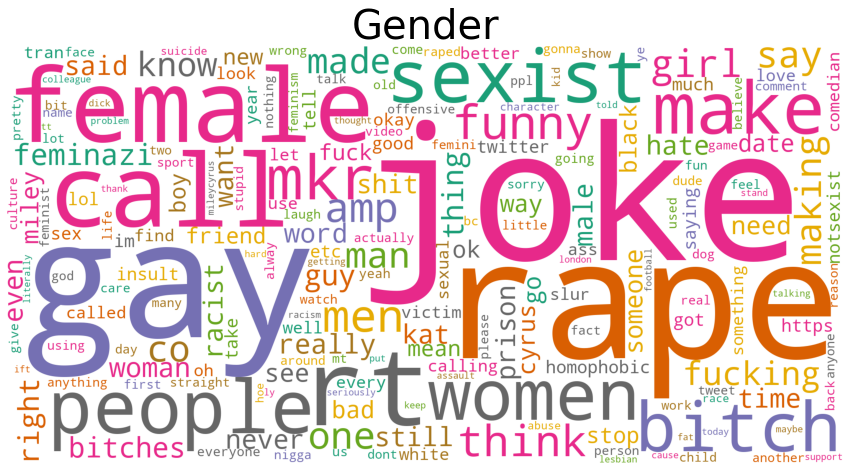

In [15]:
plt.figure(figsize=(15,10))
subset2 = data[data['cyberbullying_type']=='gender']
text_gender = subset2.tweet_text.values
cloud2=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud2)

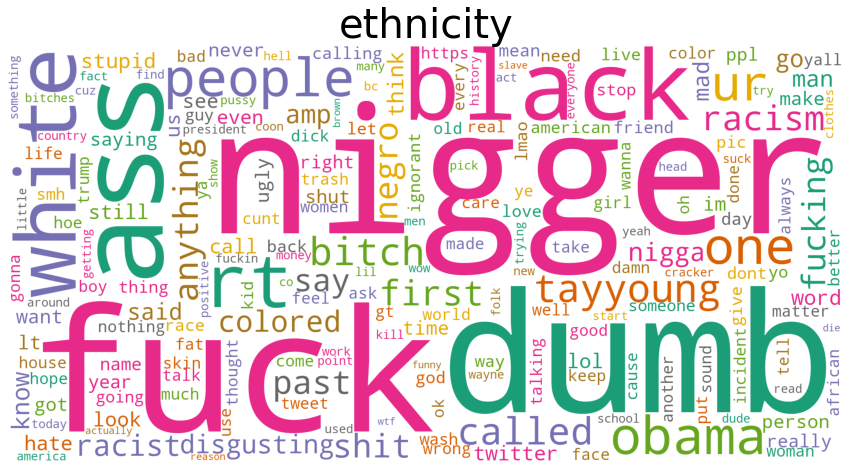

In [16]:
plt.figure(figsize=(15,10))
subset3 = data[data['cyberbullying_type']=='ethnicity']
text_ethnicity = subset3.tweet_text.values
cloud3=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_ethnicity))

plt.axis('off')
plt.title("ethnicity",fontsize=40)
plt.imshow(cloud3)

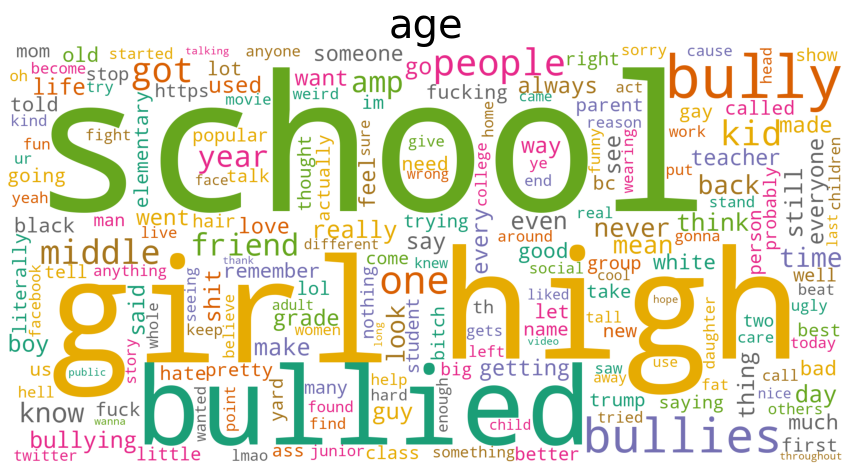

In [17]:
plt.figure(figsize=(15,10))
subset4 = data[data['cyberbullying_type']=='age']
text_age = subset4.tweet_text.values
cloud4=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_age))

plt.axis('off')
plt.title("age",fontsize=40)
plt.imshow(cloud4)

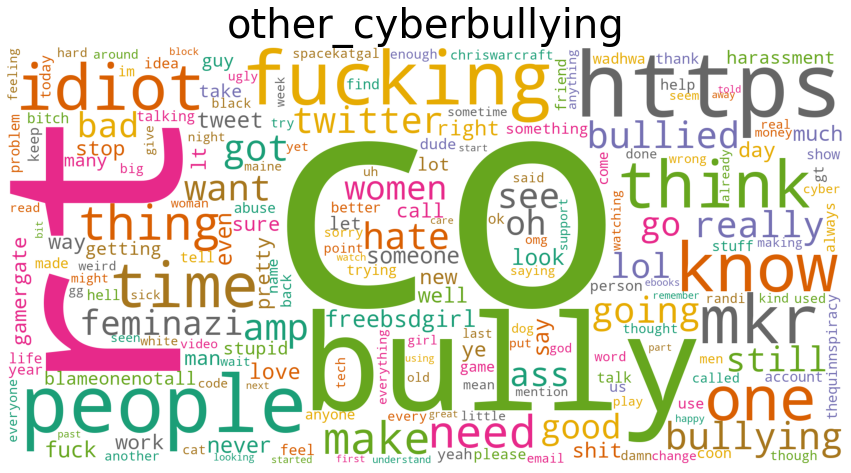

In [18]:
plt.figure(figsize=(15,10))
subset5 = data[data['cyberbullying_type']=='other_cyberbullying']
text_other = subset5.tweet_text.values
cloud5=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_other))

plt.axis('off')
plt.title("other_cyberbullying",fontsize=40)
plt.imshow(cloud5)

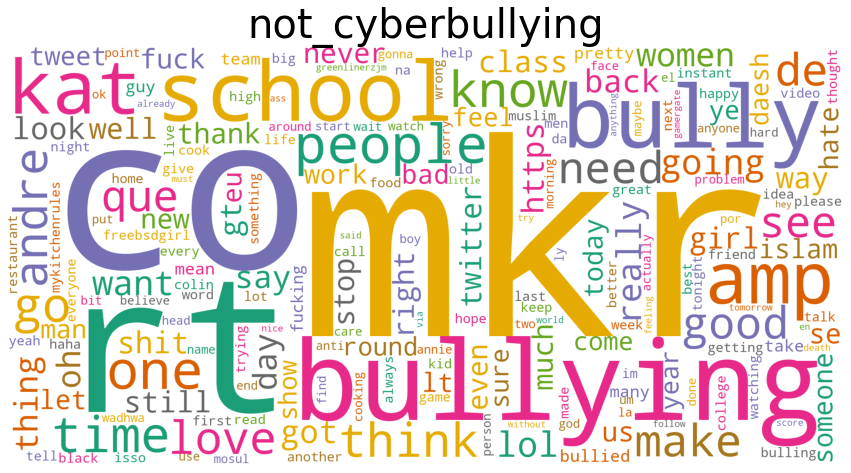

In [19]:
plt.figure(figsize=(15,10))
subset6 = data[data['cyberbullying_type']=='not_cyberbullying']
text_not = subset6.tweet_text.values
cloud6=WordCloud(background_color='white',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_not))

plt.axis('off')
plt.title("not_cyberbullying",fontsize=40)
plt.imshow(cloud6)

# SPLITTING OF DATA

In [20]:
y = pd.get_dummies(data.cyberbullying_type)
y

,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
47720,0,1,0,0,0,0
47721,0,1,0,0,0,0
47722,0,1,0,0,0,0
47723,0,1,0,0,0,0


In [21]:
labels = list(y.columns)
labels

['age',
 'ethnicity',
 'gender',
 'not_cyberbullying',
 'other_cyberbullying',
 'religion']

In [22]:
x=data['tweet_text']

In [23]:
x_train, x_val, y_train, y_val = train_test_split(data['tweet_text'],y, test_size=0.4)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.25)

# NATURAL LANGUAGE PROCESSING USING KERAS

In [24]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=2000, oov_token="<OOV>")
tokenizer.fit_on_texts(x)
word_index = tokenizer.word_index

x_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=100, padding='post', truncating='post')
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=100, padding='post', truncating='post')
x_val = pad_sequences(tokenizer.texts_to_sequences(x_val), maxlen=100, padding='post', truncating='post')

# LSTM MODEL WITH EMBEDDING LAYER

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 64), # embedding layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2)), # LSTM layer
    tf.keras.layers.Dropout(rate=0.2), # dropout layer
    tf.keras.layers.Dense(64, activation='relu'), # fully connected layer
    tf.keras.layers.Dense(6, activation='sigmoid') # final layer
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          128000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 202,694
Trainable params: 202,694
Non-trainable params: 0
__________________________________________________

In [26]:
e = EarlyStopping(patience=2)
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_val, y_val), callbacks = [e])

Epoch 1/25
895/895 [==============================] - 653s 703ms/step - loss: 0.2010 - accuracy: 0.6904 - auc: 0.9438 - val_loss: 0.1300 - val_accuracy: 0.8078 - val_auc: 0.9790
Epoch 2/25
895/895 [==============================] - 860s 961ms/step - loss: 0.1236 - accuracy: 0.8212 - auc: 0.9806 - val_loss: 0.1262 - val_accuracy: 0.8201 - val_auc: 0.9799
Epoch 3/25
895/895 [==============================] - 882s 985ms/step - loss: 0.1120 - accuracy: 0.8433 - auc: 0.9842 - val_loss: 0.1228 - val_accuracy: 0.8312 - val_auc: 0.9812
Epoch 4/25
895/895 [==============================] - 615s 686ms/step - loss: 0.1039 - accuracy: 0.8567 - auc: 0.9864 - val_loss: 0.1248 - val_accuracy: 0.8243 - val_auc: 0.9803
Epoch 5/25
895/895 [==============================] - 500s 559ms/step - loss: 0.0989 - accuracy: 0.8652 - auc: 0.9879 - val_loss: 0.1241 - val_accuracy: 0.8309 - val_auc: 0.9806


In [27]:
model.save("cyberbullying_classification.h5")

# TESTING

In [28]:
y_test= y_test.reset_index().drop(columns=["index"]).idxmax(axis="columns").apply(labels.index).values
y_test

array([2, 3, 1, ..., 4, 0, 2], dtype=int64)

In [29]:
y_pred = tf.nn.softmax(model.predict(x_test)).numpy().argmax(axis=1)
y_pred

array([2, 4, 1, ..., 4, 0, 2], dtype=int64)

In [30]:
(y_pred == y_test).mean()

0.8382568615126754

In [31]:
print(classification_report(y_test, y_pred, target_names=labels, digits=3))

                     precision    recall  f1-score   support

                age      0.967     0.973     0.970       815
          ethnicity      0.994     0.981     0.987       805
             gender      0.898     0.854     0.875       793
  not_cyberbullying      0.674     0.489     0.566       794
other_cyberbullying      0.575     0.783     0.663       762
           religion      0.957     0.940     0.949       804

           accuracy                          0.838      4773
          macro avg      0.844     0.837     0.835      4773
       weighted avg      0.847     0.838     0.838      4773



In [32]:
y_rand = np.random.random(*y_test.shape).round().astype(int)
(y_rand == y_test).mean()

0.16383825686151268

In [33]:
print(classification_report(y_test, y_rand, target_names=labels, digits=3))

                     precision    recall  f1-score   support

                age      0.162     0.475     0.241       815
          ethnicity      0.166     0.491     0.248       805
             gender      0.000     0.000     0.000       793
  not_cyberbullying      0.000     0.000     0.000       794
other_cyberbullying      0.000     0.000     0.000       762
           religion      0.000     0.000     0.000       804

           accuracy                          0.164      4773
          macro avg      0.055     0.161     0.082      4773
       weighted avg      0.056     0.164     0.083      4773



C:\Users\gowri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gowri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gowri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# PREDICTION OF A COMMENT

In [34]:
review = str(input('Enter your comments: '))

Enter your comments: I hate Niggas


In [35]:
review = cleandata(review)
words = review.split(' ')
filtered = [w for w in words if w not in stopwords]
filtered = ' '.join(filtered)
filtered = [filtered.lower()]


In [36]:
tokenize_words = tokenizer.texts_to_sequences(filtered)
tokenize_words = pad_sequences(tokenize_words, maxlen=100, padding='post', truncating='post')
print(len(tokenize_words))

1


In [37]:
a=dict(enumerate(labels))
a

{0: 'age',
 1: 'ethnicity',
 2: 'gender',
 3: 'not_cyberbullying',
 4: 'other_cyberbullying',
 5: 'religion'}

# OUTPUT

In [38]:
result = model.predict(tokenize_words)
if a[result.argmax()]=="not_cyberbullying":
  print(a[result.argmax()])
else:
  print(" -------------------------------------------------------")
  print("| Warning!!!!!!!!!! your are involving in cyberBullying |")
  print(" -------------------------------------------------------")
  print( "Bullying Type: "+a[result.argmax()])


 -------------------------------------------------------
| Warning!!!!!!!!!! your are involving in cyberBullying |
 -------------------------------------------------------
Bullying Type: ethnicity


# PREDICTION OF A FILE OF COMMENTS

In [59]:
out=preprocess(r"D:\cyberbullying project\other456.csv")
out.dropna(axis=1,inplace=True)

In [60]:
li=[]
for i in out.iloc[:,-1]:
    words = i.split(' ')
    filtered = [w for w in words if w not in stopwords]
    filtered = ' '.join(filtered)
    filtered = [filtered.lower()]
    tokenize_words = tokenizer.texts_to_sequences(filtered)
    tokenize_words = pad_sequences(tokenize_words, maxlen=100, padding='post', truncating='post')
    result = model.predict(tokenize_words)
    li.append(a[result.argmax()])
out["cyberbullying_type"]=li

C:\Users\gowri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


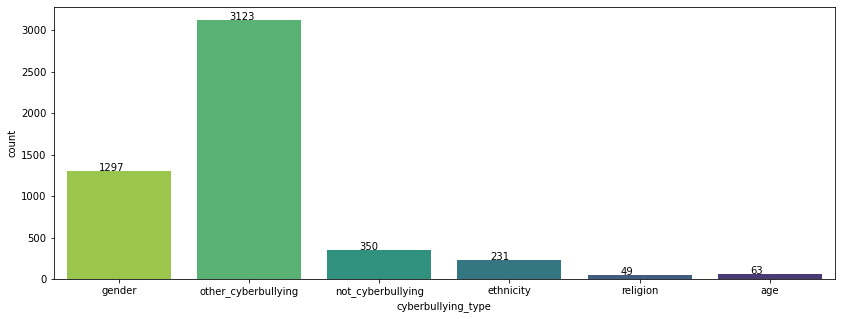

In [67]:
import seaborn as sns
plt.figure(figsize=(14,5))
ax=sns.countplot(out.cyberbullying_type,palette="viridis_r")
for p in ax.patches:
  ax.annotate('{:}'.format(p.get_height()),(p.get_x()+0.25,p.get_height()+0.01))

In [62]:
out

,tweet_text,cyberbullying_type
0,i love seeing a bitch suffer after trying to d...,gender
1,how rich nretrumplicans love big government p...,other_cyberbullying
2,no because why is everyone on love island such...,gender
3,just cause a bitch around me don mean we fuck...,gender
4,everybody sayin they need peace they need love...,other_cyberbullying
...,...,...
5108,words every girl longs to hear i love you so...,other_cyberbullying
5109,i love bad bitches thats my fucking problem an...,other_cyberbullying
5110,i fucking love carol,other_cyberbullying
5111,juiceytoxins have my fucking love bitch lh,other_cyberbullying


In [63]:
out.to_csv("output_file.csv")

# PREDICTION ON WEB INTERFACE

In [68]:
def prediction(comment):
    review = cleandata(comment)
    words = review.split(' ')
    filtered = [w for w in words if w not in stopwords]
    filtered = ' '.join(filtered)
    filtered = [filtered.lower()]
    tokenize_words = tokenizer.texts_to_sequences(filtered)
    tokenize_words = pad_sequences(tokenize_words, maxlen=100, padding='post', truncating='post')
    result = model.predict(tokenize_words)
    if a[result.argmax()]=="not_cyberbullying":
      return "Good! Not a cyberbullying Comment."
    else:
      return "| Warning!!!!!!! your are involving in cyberBullying |"+"\n"+"Bullying Type: "+a[result.argmax()] 

In [69]:
import gradio
gradio.Interface(prediction,inputs="text",outputs="text",title="Cyberbullying Classification",allow_flagging="never").launch(share=True)

Running on local URL:  http://127.0.0.1:7860/
Running on public URL: https://26012.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x22fca706160>,
 'http://127.0.0.1:7860/',
 'https://26012.gradio.app')